# Logistic regression and regularization

Plot 1D logistic regression objective function with and without regularization term, for step function data which has a large gap at the origin.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import special
import sklearn.metrics
plt.style.use('classic')

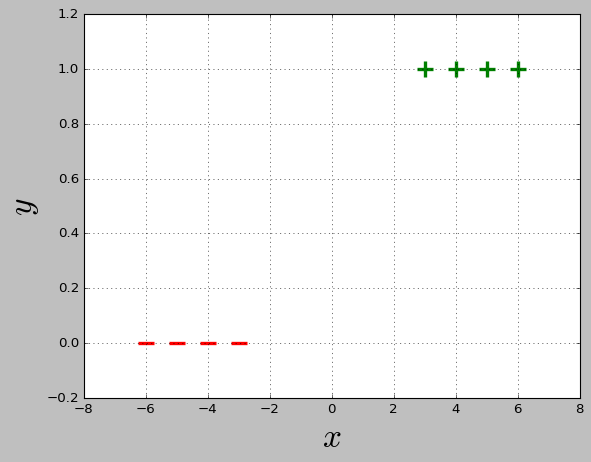

In [62]:
# data: step function but with large gap at origin
gap = 3
npts = 4
X = np.array( (-gap - np.array(range(npts))).tolist()  + (gap + np.array(range(npts))).tolist() )
Y = np.array( [0] * npts + [1] * npts )
mctab = {0: ('_', 'r'),
        1: ('+', 'g'),
        }
for idx, ypt in enumerate(Y):        
    xpt = X[idx]
    marker, mcolor = mctab[ypt]             
    plt.scatter([xpt], [ypt],  s=200, marker=marker, linewidth=3, color=mcolor)
    plt.xlabel("$x$", fontsize=30)
    plt.ylabel("$y$", fontsize=30)
    plt.grid(1)
plt.gcf().savefig("linear_logistic_classifier_and_regularization_data.pdf", bbox_inches='tight')

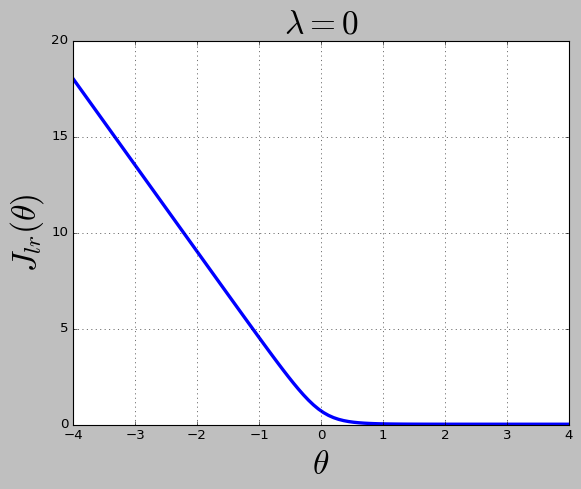

In [67]:
# logistic regression loss function (no regularization)
def objective(theta):
    guesses = special.expit(X *theta)
    Lnll = sklearn.metrics.log_loss(Y, guesses)
    return Lnll
thvec = np.linspace(-4, 4, 100)
lvec = [objective(theta)+0.04 for theta in thvec]
plt.plot(thvec, lvec, linewidth=3)
plt.xlabel(r"$\theta$", fontsize=30)
plt.ylabel(r"$J_{lr}(\theta)$", fontsize=30)
plt.grid(1)
plt.gca().set_ylim([0, 20])
plt.title(r"$\lambda=0$", fontsize=30)
plt.gcf().savefig("linear_logistic_classifier_and_regularization_objective_noreg.pdf", bbox_inches='tight')

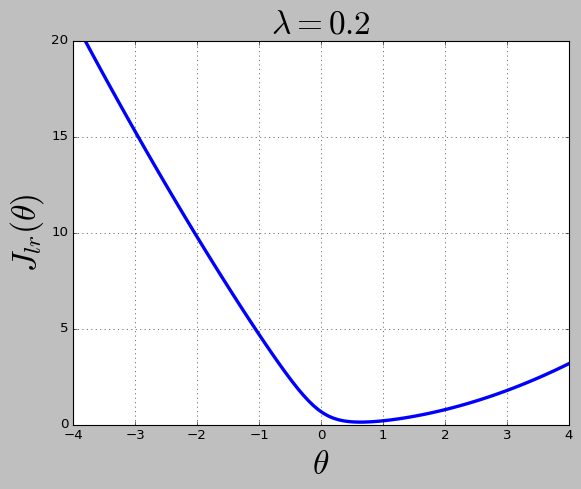

In [68]:
# logistic regression loss function with regularization
def objective2(theta, lam=0):
    guesses = special.expit(X *theta)
    Lnll = sklearn.metrics.log_loss(Y, guesses) + lam * theta**2
    return Lnll
thvec = np.linspace(-4, 4, 100)
lvec = [objective2(theta, 0.2) for theta in thvec]
plt.plot(thvec, lvec, linewidth=3)
plt.xlabel(r"$\theta$", fontsize=30)
plt.ylabel(r"$J_{lr}(\theta)$", fontsize=30)
plt.grid(1)
plt.title(r"$\lambda=0.2$", fontsize=30)
plt.gca().set_ylim([0, 20])
plt.gcf().savefig("linear_logistic_classifier_and_regularization_objective_withreg.pdf", bbox_inches='tight')